In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
font = {'weight' : 'bold',
        'size'   : 33}
axes = {'titleweight' : 'bold',
        'labelweight' : 'bold'}
lines = {'linewidth': 5}
plt.rc('font', **font)
plt.rc('lines', **lines)
plt.rc('axes', **axes)

In [3]:
score = np.array([])
type = np.array([])
k = np.array([])
data = np.array([])

silhouette = np.load("./result/k_shadow/imagenet/silhouette_coefficients_k.npy")
x = np.array([np.arange(10, 201, 10) for _ in range(silhouette.shape[0])])
silhouette_coefficients = silhouette.reshape(-1,)
x = x.reshape(-1,)
score = np.append(score, silhouette_coefficients)
k = np.append(k, x)
type = np.append(type, np.array(["silhouette"]*x.shape[0]))
data = np.append(data, np.array(["imagenet100"]*x.shape[0]))

sse = np.load("./result/k_shadow/imagenet/sse_k.npy")
x = np.array([np.arange(10, 201, 10) for _ in range(sse.shape[0])])
sse = sse.reshape(-1,)
x = x.reshape(-1,)
score = np.append(score, sse)
k = np.append(k, x)
type = np.append(type, np.array(["sse"]*x.shape[0]))
data = np.append(data, np.array(["imagenet100"]*x.shape[0]))

silhouette = np.load("./result/k_shadow/cifar10/silhouette_coefficients_k.npy")
x = np.array([np.arange(2, 30, 2) for _ in range(silhouette.shape[0])])
silhouette_coefficients = silhouette.reshape(-1,)
x = x.reshape(-1,)
score = np.append(score, silhouette_coefficients)
k = np.append(k, x)
type = np.append(type, np.array(["silhouette"]*x.shape[0]))
data = np.append(data, np.array(["cifar10"]*x.shape[0]))

sse = np.load("./result/k_shadow/cifar10/sse_k.npy")
x = np.array([np.arange(2, 30, 2) for _ in range(sse.shape[0])])
sse = sse.reshape(-1,)
x = x.reshape(-1,)
score = np.append(score, sse)
k = np.append(k, x)
type = np.append(type, np.array(["sse"]*x.shape[0]))
data = np.append(data, np.array(["cifar10"]*x.shape[0]))

df = pd.DataFrame({'data': data, 'k': k, 'score': score, 'type': type})
df.to_csv("./result/k_shadow/plot.csv")

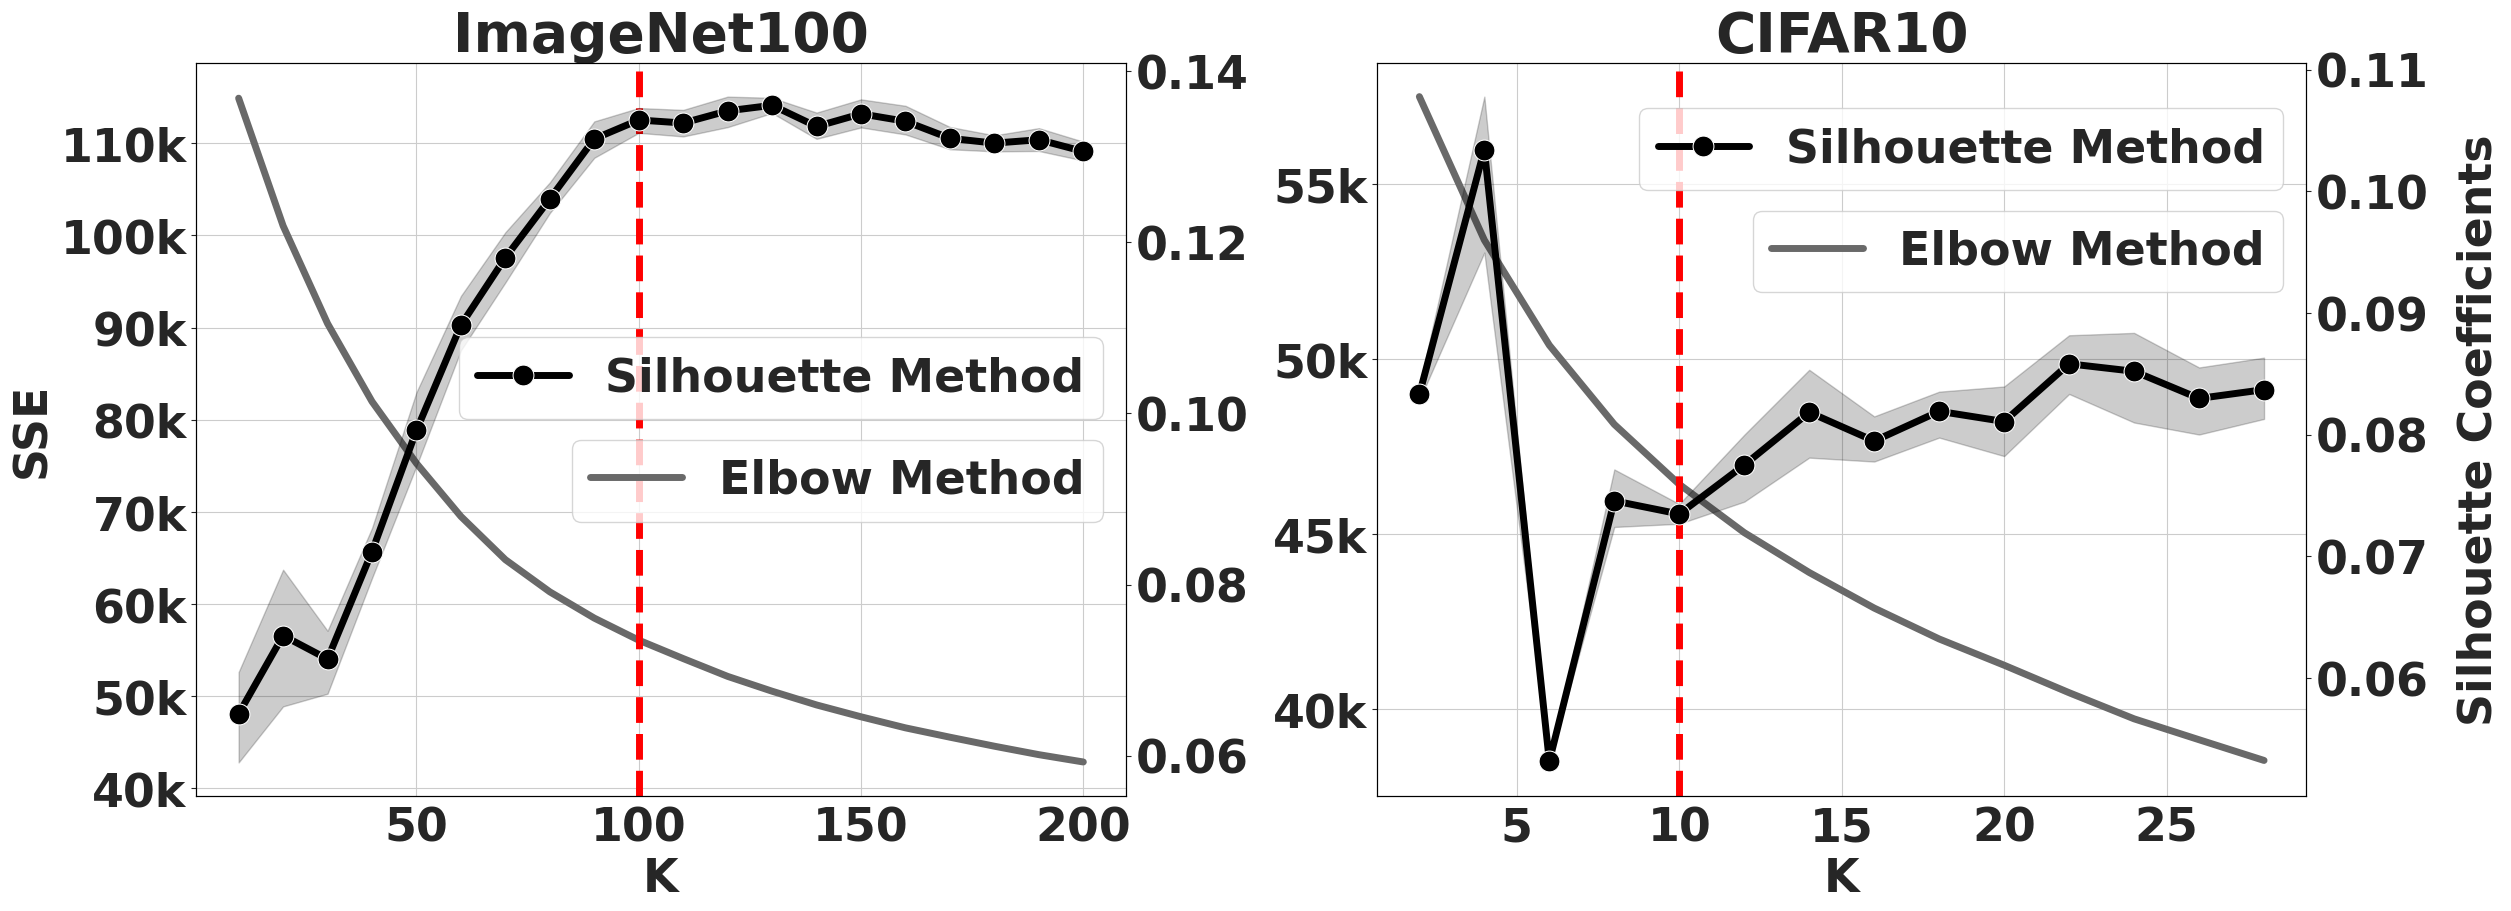

In [4]:
df = pd.read_csv("./result/k_shadow/plot.csv")

fig, axs = plt.subplots(figsize=(25, 9), ncols=2, layout="constrained")
ax2 = axs[0].twinx()
ax4 = axs[1].twinx()

sns.lineplot(x="k", y="score", data=df[(df["type"]=="sse") & (df['data']=='imagenet100')], ax=axs[0], color='dimgray', label='Elbow Method')
sns.lineplot(x="k", y="score", data=df[(df["type"]=="silhouette") & (df['data']=='imagenet100')], ax=ax2, color='black', label='Silhouette Method', marker='o', markersize=15)
sns.lineplot(x="k", y="score", data=df[(df["type"]=="sse") & (df['data']=='cifar10')], ax=axs[1], color='dimgray', label='Elbow Method')
sns.lineplot(x="k", y="score", data=df[(df["type"]=="silhouette") & (df['data']=='cifar10')], ax=ax4, color='black', label='Silhouette Method', marker='o', markersize=15)

axs[0].set_xlabel('K')
axs[1].set_xlabel('K')
axs[0].set_ylabel('SSE')
# axs[1].set_ylabel('SSE')
axs[1].set_ylabel('')
# ax2.set_ylabel('Silhouette Coefficients', labelpad=20)
ax2.set_ylabel('')
ax4.set_ylabel('Silhouette Coefficients', labelpad=20)

axs[0].spines[['top', 'bottom', 'right', 'left']].set_color('black')
axs[1].spines[['top', 'bottom', 'right', 'left']].set_color('black')
ax2.spines[['top', 'bottom', 'right', 'left']].set_color('black')
ax4.spines[['top', 'bottom', 'right', 'left']].set_color('black')

axs[0].set_yticks([40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000])
axs[0].set_yticklabels(['40k', '50k', '60k', '70k', '80k', '90k', '100k', '110k'])

axs[1].set_yticks([40000, 45000, 50000, 55000])
axs[1].set_yticklabels(['40k', '45k', '50k', '55k'])

axs[0].axvline(x=100, color='r', linestyle='--')
axs[0].set_title('ImageNet100')
axs[0].grid(True)
ax2.grid(False)

axs[1].axvline(x=10, color='r', linestyle='--')
axs[1].set_title('CIFAR10')
axs[1].grid(True)
ax4.grid(False)

legend = axs[0].legend(loc='center right', bbox_to_anchor=(1, 0.43))
legend = ax2.legend(loc='center right', bbox_to_anchor=(1, 0.57))
legend = axs[1].legend(loc='upper right', bbox_to_anchor=(1, 0.83))
legend = ax4.legend(loc='upper right', bbox_to_anchor=(1, 0.97))

plt.savefig("./result/k_decision.pdf")
plt.show()